In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/transcripts_normalized.csv", header=0)
df.dropna(subset=["transcript"], inplace=True)
df.head()

,video_id,transcript
0,AAHiZ-c88ec,man getting frustrated water heater delivery s...
1,AEsRr-ZnzNc,start give shoutout rokukun vyonder harry stac...
2,AJpzk-aFZPU,test number alright ground god crunch eat crun...
3,AONXX-h9SdI,play something brand new album came october th...
4,AOZIY-AwsjM,music


In [3]:
lex_div = []
for idx, row in df.iterrows():
    transcript = row["transcript"]
    words = transcript.split()
    word_freq = Counter(words)
    lex_div.append(len(word_freq) / len(words))

df["lex_div"] = lex_div

In [4]:
df["lex_div"].describe()

count    2618.000000
mean        0.667021
std         0.239024
min         0.002242
25%         0.496422
50%         0.684884
75%         0.857143
max         1.000000
Name: lex_div, dtype: float64

32
[('sorry', 1490), ('kill', 1061), ('drop', 983), ('die', 951), ('death', 897), ('dont', 890), ('sure', 764), ('one', 750), ('know', 745), ('team', 722), ('thunder', 703), ('come', 680), ('left', 628), ('guy', 552), ('scared', 525), ('check', 514), ('nice', 479), ('bella', 470), ('boom', 447), ('test', 446), ('take', 439), ('good', 413), ('god', 353), ('play', 345), ('side', 316), ('use', 309), ('say', 281), ('bang', 280), ('coming', 262), ('hold', 255), ('hey', 235), ('man', 229), ('hide', 226), ('ray', 226), ('daddy', 225), ('game', 223), ('bigger', 223), ('clip', 223), ('master', 223), ('ah', 221), ('surprise', 221), ('family', 220), ('niya', 220), ('able', 214), ('give', 210), ('fight', 205), ('corbett', 201), ('thank', 197), ('he', 194), ('back', 193), ('hug', 184), ('zone', 178), ('shoot', 169), ('teddy', 167), ('bear', 165), ('switch', 161), ('buy', 155), ('twinkle', 154), ('job', 153), ('killed', 152), ('long', 152), ('care', 151), ('best', 150), ('jump', 149), ('getting', 14

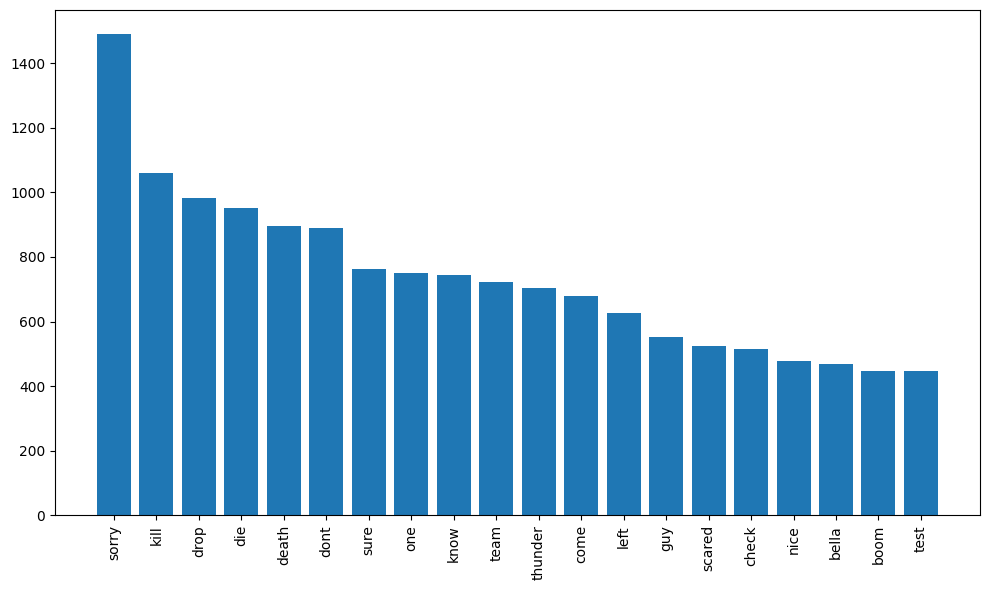

In [5]:
low_lex = df[df["lex_div"] < 0.1]
print(len(low_lex))
all_words = " ".join(low_lex["transcript"]).split()
word_freq = Counter(all_words)
print(word_freq.most_common(100))
word, count = zip(*word_freq.most_common(20))
plt.figure(figsize=(10, 6))
plt.bar(word, count)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

1594
[('im', 2835), ('like', 2293), ('get', 1613), ('one', 1588), ('know', 1514), ('dont', 1297), ('going', 1279), ('got', 1210), ('go', 1164), ('see', 1075), ('oh', 1042), ('thats', 1008), ('yeah', 950), ('right', 924), ('time', 883), ('let', 875), ('want', 833), ('well', 827), ('really', 816), ('good', 785)]


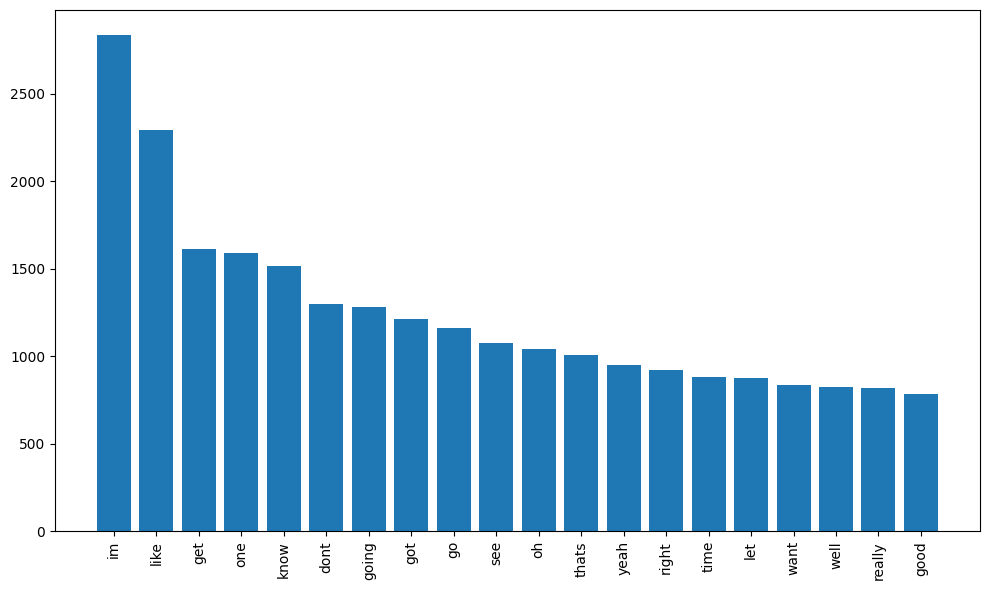

In [26]:
high_lex = df[df["lex_div"] > 0.5]
print(len(high_lex))
all_words = " ".join(high_lex["transcript"]).split()
word_freq = Counter(all_words)
print(word_freq.most_common(20))
word, count = zip(*word_freq.most_common(20))
plt.figure(figsize=(10, 6))
plt.bar(word, count)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()